In [2]:
import requests 
import json
import pandas 
from datetime import date
from datetime import timedelta
pandas.options.display.float_format = '{:.2f}'.format

#Lien pour les CAS : https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv


In [28]:
#Importer le fichier (NB DE CAS PAR GROUPE D'ÂGE)
fichier_age = pandas.read_csv('https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv', delimiter=',')

# retirer les lignes qui ont des valeurs inconnues 'Unknown' selon leur index
fichier_total_cases = fichier_age.drop([103, 106, 289, 514, 1287, 1637, 1730, 1870, 2128, 2378, 2380, 2391, 2582, 2594, 2722, 2814, 2935, 3467, 3506], axis=0)

# remplacer les valeurs 'Replaced' par 'Recovered' pour ne pas qu'il y ait un conflit lorsque l'on va sélectionner
# chaque valeur dans la cellule suivante
fichier_replaced = fichier_total_cases.replace(to_replace='Resolved', value='Recovered')

In [29]:
# sélectionner seulement les 'Recovered'
fichier_recovered = fichier_replaced.loc[fichier_replaced['OUTCOME1'] == 'Recovered']
fichier_recovered_1 = fichier_recovered.groupby(['Age_Group'])[['OUTCOME1']].count()
fichier_recovered_2 = fichier_recovered_1.reset_index()

# sélectionner seulement les 'Not Resolved'
fichier_not_resolved = fichier_replaced.loc[fichier_replaced['OUTCOME1'] == 'Not Resolved']
fichier_not_resolved_1 = fichier_not_resolved.groupby(['Age_Group'])[['OUTCOME1']].count()
fichier_not_resolved_2 = fichier_not_resolved_1.reset_index()

# sélectionner seulement les 'Fatal'
fichier_fatal = fichier_replaced.loc[fichier_replaced['OUTCOME1'] == 'Fatal']
fichier_fatal_1 = fichier_fatal.groupby(['Age_Group'])[['OUTCOME1']].count()
fichier_fatal_2 = fichier_fatal_1.reset_index()

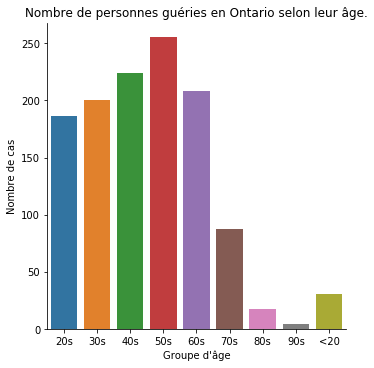

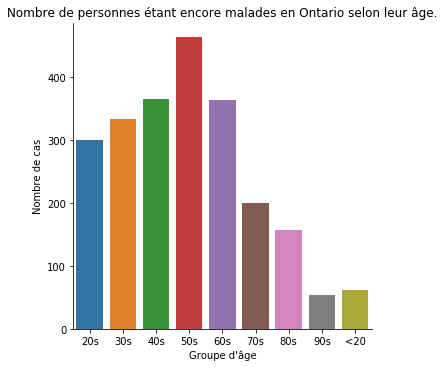

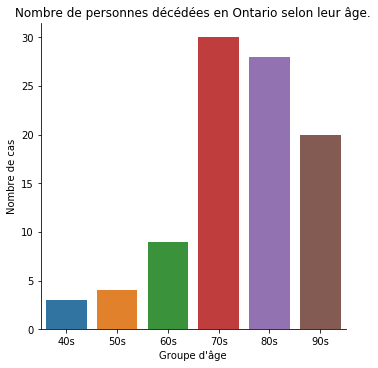

In [30]:
import seaborn

# faire les 3 graphiques
seaborn.catplot(kind='bar', x='Age_Group', y='OUTCOME1', data=fichier_recovered_2).set(xlabel="Groupe d'âge", ylabel='Nombre de cas', title='Nombre de personnes guéries en Ontario selon leur âge.')
seaborn.catplot(kind='bar', x='Age_Group', y='OUTCOME1', data=fichier_not_resolved_2).set(xlabel="Groupe d'âge", ylabel='Nombre de cas', title='Nombre de personnes étant encore malades en Ontario selon leur âge.')
seaborn.catplot(kind='bar', x='Age_Group', y='OUTCOME1', data=fichier_fatal_2).set(xlabel="Groupe d'âge", ylabel='Nombre de cas', title='Nombre de personnes décédées en Ontario selon leur âge.')